<a href="https://colab.research.google.com/github/Aatika1/openai-API/blob/main/Panaverse_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U langchain langchain-google-genai langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.8/124.8 kB 5.5 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
google_api=userdata.get('GEMINI_API_KEY')

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm:ChatGoogleGenerativeAI=ChatGoogleGenerativeAI(
    model='gemni-1.5-flash',
    api_key="google_api",
)

In [6]:
from langchain_core.messages.ai import AIMessage

ai_msg:AIMessage=llm.invoke("hello?")

In [7]:
print(ai_msg.content)

Hello there! How can I assist you today?


In [11]:
from typing_extensions import TypedDict

class customer_service(TypedDict):
  prompt:str
  output:str


In [12]:
def chatbot(state:customer_service):
  print("---chatbot---",state)
  prompt=state["prompt"]
  ai_msg:AIMessage=llm.invoke(prompt)
  return("output",ai_msg.content)

In [14]:
abuzar_greet=chatbot(customer_service(prompt="Hi I am abuzar"))
print(abuzar_greet)

---chatbot--- {'prompt': 'Hi I am abuzar'}
('output', "Hello Abuzar, it's nice to meet you. My name is Gemini, and I'm a large multi-modal model, trained by Google. I'm designed to understand and generate human language, and to answer questions and provide information to the best of my abilities. Is there anything I can help you with today?")


In [18]:
from IPython.display import Image, display

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

builder:StateGraph=StateGraph(state_schema=customer_service)

builder.add_node("chatbot",chatbot)

builder.add_edge(START,"chatbot")
builder.add_edge("chatbot",END)

graph:CompiledStateGraph=builder.compile()


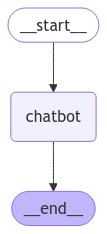

In [19]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [28]:
result=graph.invoke({"prompt" : "what is AI agent"})

---chatbot--- {'prompt': 'what is AI agent'}


In [31]:
print(result)

{'prompt': 'what is AI agent', 'output': '**Definition:**\n\nAn AI agent is a computational entity that can perceive its environment, reason about it, and take actions to achieve its goals.\n\n**Characteristics:**\n\n* **Autonomy:** Can operate independently of human control.\n* **Perception:** Can sense and interpret information from the environment.\n* **Reasoning:** Can process information to make decisions and solve problems.\n* **Goal-oriented:** Has specific objectives it aims to achieve.\n* **Learning:** Can adapt and improve its performance based on experience.\n* **Interaction:** Can communicate with and affect its environment.\n\n**Types of AI Agents:**\n\n* **Reactive agents:** Respond to immediate stimuli without memory or planning.\n* **Model-based agents:** Build internal models of the environment to make decisions.\n* **Goal-based agents:** Use a goal-oriented approach to plan actions and achieve objectives.\n* **Utility-based agents:** Make decisions based on the expect